In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import time

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
start_time = time.time()
renderer = o3d.visualization.rendering.OffscreenRenderer(500,500)
print("Time to initialize renderer: ", time.time()-start_time)

[Open3D INFO] EGL headless mode enabled.
Time to initialize renderer:  0.0779266357421875
FEngine (64 bits) created at 0x7f2178dbe010 (threading is enabled)
EGL(1.5)
OpenGL(4.1)


Time to initialize renderer:  5.817413330078125e-05
TriangleMesh with 172974 points and 345944 triangles.


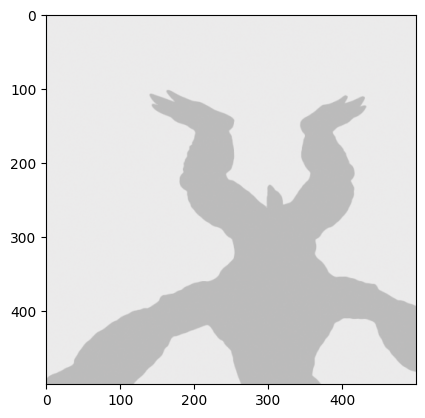

In [3]:
# try:
#     del renderer
# except:
#     pass
start_time = time.time()
renderer.scene.clear_geometry()
print("Time to initialize renderer: ", time.time()-start_time)
mtl = o3d.visualization.rendering.MaterialRecord()
mtl.base_color = [1.0, 1.0, 1.0, 1.0]  # RGBA, does not replace the mesh color
mtl.shader = "defaultUnlit"

armadillo_mesh = o3d.data.ArmadilloMesh()
mesh = o3d.io.read_triangle_mesh(armadillo_mesh.path)
print(mesh)
# o3d.visualization.draw_geometries([mesh])

renderer.scene.add_geometry("grid", mesh, mtl)

intrinsics = o3d.camera.PinholeCameraIntrinsic(400, 500, 250, 250, 250, 250)
# #extrensics: translation 2 meters above self.poi in z. Looking down

pose = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, -100],
    [0, 0, 0, 1]
])

extrinsics = np.linalg.inv(pose)

renderer.setup_camera(intrinsics, extrinsics)
img = np.asarray(renderer.render_to_image())
plt.imshow(img)
plt.show()

In [11]:
vis = o3d.visualization.Visualizer()

start_time = time.time()
vis.create_window()
vis.add_geometry(mesh)
print("Time to initialize vis: ", time.time()-start_time)

vis.run() 
vis.destroy_window()

Time to initialize vis:  0.272935152053833


In [14]:
start_time = time.time()
o3d.visualization.draw_geometries([mesh])
print("Time to initialize vis: ", time.time()-start_time)

Time to initialize vis:  0.4496772289276123
